#### Habiba Arioui Mono 1A 

# MOUVEMENT RÉTROGRADE DE MARS - MINI PROJET 1

## Introduction

Tous les deux ans, si l’on regarde la position de Mars depuis la Terre par rapport à la voûte céleste, la planète rouge semble faire un bref demi-tour, avant de repartir dans le même sens. Ce mouvement rétrograde est observé depuis l’antiquité.

Le but de ce mini-projet est de construire un modèle reproduisant ce phénomène.

## À la maison

Rappel des équations du mouvement X(t) et Y(t) d'un mouvement circulaire et uniforme, de rayon R, période T et de phase à l'origine phi0:
X(t)=R.cos(2pi*t/T + phi0)
Y(t)=R.sin(2pi*t/T + phi0)

À t=0, l'objet pointe dans la direction de phi0.

## Comment trouver Phi_app, soit la longitude de Lars par rapport à la Terre, en fonction du temps?

1) Équations du mouvement de Mars et de la Terre:

On écrit les équations du mouvement de Mars et de la Terre dans le référentiel du plan écliptique:


Xm(t)= Rm*cos(omegaM*t + phi0m)
Ym(t)= Rm*sin(omegaM*t + phi0m)


Xterre(t)= Rt*cos(omegaT*t + phi0t)
Yterre(t)= Rt*sin(omegaT*t + phi0t)


2) Choix des phi0:

On choisit pour la Terre une phase à l'origine nulle. Pour Mars, il nous est précisé que le milieu du mouvement de rétrogation correspond à l'alignement Terre Soleil Mars.

J'ai d'abord choisi une phase nulle, qui a eu lieu le 2017-01-29. Cette date sera donc mon repère, le t0=0. Ceci a résulté a une courbe de modélisation presque identique à celle des mesures du fichier DataMars.csv, mais inversée.

J'ai alors choisi un angle égal à pi, toujours correspondant à l'alignement terre mars soleil.


3) Calcul de Phi_app:

Il est alors très simple de trouver la tagente de l'angle phi, i.e. la longitude:


tan(phi)= (Rm*np.sin(OmegaM*t + np.pi)-Rt*np.sin(OmegaT*t))/(Rm*np.cos(OmegaM*t + np.pi)-Rt*np.cos(OmegaT*t))


On utilise ensuite np.arctan(numérateur sous forme de array, dénominateur sous forme de array) pour avoir toutes les valeurs de phi en fonction de la date. On a ensuite converti les radians en degré.


4) Code informatique: (qui fonctionne)

Voici donc le code qui permet d'obtenir un graphique avec 2 courbes: celle résultant des mesures du fichier, et celle que l'on obtient à l'aide de notre modélisation.

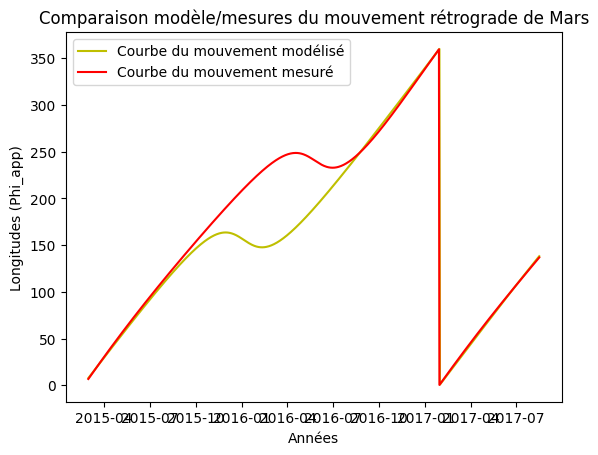

In [34]:
##Import des bibliothèques nécessaires

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



##Lecture du fichier datamars

datamars = pd.read_csv("/home/jupyter-22443/etu-demarche-de-modelisation/DataMars.csv", comment = '#')



##Définitions des constantes

Rm = 1.52371    #Rayon orbital de Mars autour du soleil en UA
Rt = 1          #Rayon orbital de la terre autour du soleil en UA
Tm = 686.885    #Période de révolution de MArs en jours
Tt = 365.256    #Période de révolution de la terre en jours
OmegaM = 2*np.pi/Tm
OmegaT = 2*np.pi/Tt




##Échelle de temps adaptée au choix: t_0=2017-01-29, avec une phase à l'origine phi_0M=+/- pi pour Mars, et une pahse à l'origine , correspondant à l'alignement de la Terre, du Soleil et Mars (dans cet ordre)

dates_donnees_str = [ i for i in datamars.loc[:,'Date'] ]
dates_donnees=[ np.datetime64(dt) for dt in dates_donnees_str ]
date_al = np.datetime64('2017-01-29')
dates_donnees_relatives_alignement = [ (np.datetime64(dt) - date_al).astype(int) for dt in dates_donnees]    #on choisit t0=20217-01-29 car la phase (longitude) est égale à notr' phase à l'origine, dans cette liste.
                                                                                                             #les dates sont en jours, car les périodes de révolution sont en jours. (respect de l'homogénéité pour la suite)
dates_pour_calcul = np.array(dates_donnees_relatives_alignement)                                             # conversion de la liste en array pour l'utilisation en aval de np.arctan()
    
    

#Extraction des longitudes du fichier DataMars

longitudes_donnees = [ j for j in datamars.loc[:,'Longitude (decimal)'] ]


               
##Calcul de Phi_app, la longitude de Mars par rapport à la Terre, dans me référentiel heliocentrique
               
X1 = np.array([ (Rm*np.sin(OmegaM*t + np.pi)-Rt*np.sin(OmegaT*t)) for t in dates_pour_calcul ])  #numérateur dans le arctan
X2 = np.array([ (Rm*np.cos(OmegaM*t + np.pi)-Rt*np.cos(OmegaT*t)) for t in dates_pour_calcul ])  #dénominateur

Phi_app = np.arctan2( X1, X2 )*180/np.pi + 180   #fonction du temps = Phi_app, l'arctangente est périodique de pi (180 degré), donc on ajoute 180degrés pour superposer les courbes sans changer la réalité.



##Tracé du modèle
plt.plot( dates_donnees, Phi_app , color = 'y', linestyle = '-', label = 'Courbe du mouvement modélisé' )            #courbe jaune pour le modèle
plt.plot( dates_donnees, longitudes_donnees, color = 'r', linestyle = '-', label = 'Courbe du mouvement mesuré' )    #courbe rouge pour les mesures
plt.xlabel( 'Années' )
plt.ylabel( 'Longitudes (Phi_app)' )
plt.title( 'Comparaison modèle/mesures du mouvement rétrograde de Mars' )
plt.legend()
plt.show()




## Conclusion:

On observe que les courbes se superposent presque parfaitement autour de là où l'on a choisi t0, c'est-à-dire au moment du mouvement de rétrogradation. On remarque un écart important en 2016 (forme de S). Cela peut être du au fait que Mars est trop loin de la Terre, ce qui expliquerait le décalage entre mesures et modèle.



Je m'excuse pour le peu de lisibilité de l'axe des abscisses, les chaines de caractères se supperposent.